# Project University Mental Health

<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>Mental health is an area that is severely neglected, and can have very serious ramifications such as student self-harm and depression.</p> 
<p>Working in a university's health and wellness center, we have been tasked to identify students at risk using data so that we can help them as early as possible.</p>
<p>In this project, we will explore a dataset obtained from the research of Nguyen et al (2019), where the authors obtained a record of 268 questionaire results of depression, acculturative stress, social connectedness, and help-seeking behaviour by a cohort of local and international students. We will be training our data on various models to predict two tasks:</p>
(1) A regression problem: Predicting depression severity (depression score) of a student<br>
(2) A classification problem: Predicting whether a student have thoughts of suicide<br>
    
Task 1's models would be evaluated and selected based on their RMSE, and task 2's models would be evaluated and selected based on their Accuracy and F1 scores.
    
Research details <a href = 'https://www.mdpi.com/2306-5729/4/3/124/htm'>here</a>.
</div>

### What we'll be doing:
1. Import pandas and plotting libraries
2. Split our main DataFrame into a numerical and a categorical DataFrame
3. Perform univariate analysis on each
4. Perform bivariate analysis based on hypotheses made
5. Generate a correlation matrix using the two DataFrames

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import ttest_ind
import statistics as stat
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
#Read the CSV from Part I
cleaned_results = pd.read_csv('./datasets/filled_data.csv')

In [3]:
#Checking out the type of data is found in each column
cleaned_results.dtypes

inter_dom           object
region              object
gender              object
academic            object
age                float64
age_cate           float64
stay               float64
stay_cate           object
japanese           float64
japanese_cate       object
english            float64
english_cate        object
intimate            object
religion            object
suicide             object
dep                 object
deptype             object
todep              float64
depsev              object
tosc               float64
apd                float64
ahome              float64
aph                float64
afear              float64
acs                float64
aguilt             float64
amiscell           float64
toas               float64
partner            float64
friends            float64
parents            float64
relative           float64
profess            float64
phone              float64
doctor             float64
reli               float64
alone              float64
o

#### Split main DataFrame into two separate ones
Since there are many columns and we have two kinds of data types in all columns, we can consider splitting the DataFrame into two separate DataFrames:
1. with only dtype of float64 (float)
2. with only dtype of object (string)

In [4]:
#Get float-only DataFrame
float_only = cleaned_results.select_dtypes(np.number)

In [5]:
float_only.dtypes

age         float64
age_cate    float64
stay        float64
japanese    float64
english     float64
todep       float64
tosc        float64
apd         float64
ahome       float64
aph         float64
afear       float64
acs         float64
aguilt      float64
amiscell    float64
toas        float64
partner     float64
friends     float64
parents     float64
relative    float64
profess     float64
phone       float64
doctor      float64
reli        float64
alone       float64
others      float64
internet    float64
dtype: object

In [6]:
#Get object-only DataFrame
object_only = cleaned_results.select_dtypes(object)

In [7]:
object_only.dtypes

inter_dom          object
region             object
gender             object
academic           object
stay_cate          object
japanese_cate      object
english_cate       object
intimate           object
religion           object
suicide            object
dep                object
deptype            object
depsev             object
partner_bi         object
friends_bi         object
parents_bi         object
relative_bi        object
professional_bi    object
phone_bi           object
doctor_bi          object
religion_bi        object
alone_bi           object
others_bi          object
internet_bi        object
dtype: object

## Univariate analysis 
Univariate analysis is a form of analysis where we analyze the values in one column, e.g., distribution. 

With columns with numerical variables, we'll use a histogram. On the other hand, for columns with categorical values, we can use a countplot from seaborn, i.e. a plot that counts the frequency of the categorical values in each column. 

### Numeric columns

In [69]:
#function to plot numerical columns' distribution
def plot_numerical_charts(data, columns):
    #2 is the number of columns
    fig = plt.figure(figsize=(10*2, 7*(len(columns)/2)))
    
    for col_number, col_name in enumerate(columns):
        
        #no of rows, no of columns, nth subplot (index)
        fig.add_subplot(math.ceil(len(columns)/2), 2, col_number + 1)
        plt.hist(data[col_name])
        plt.xlabel(col_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.title('Distribution of ' + col_name, fontsize=14)

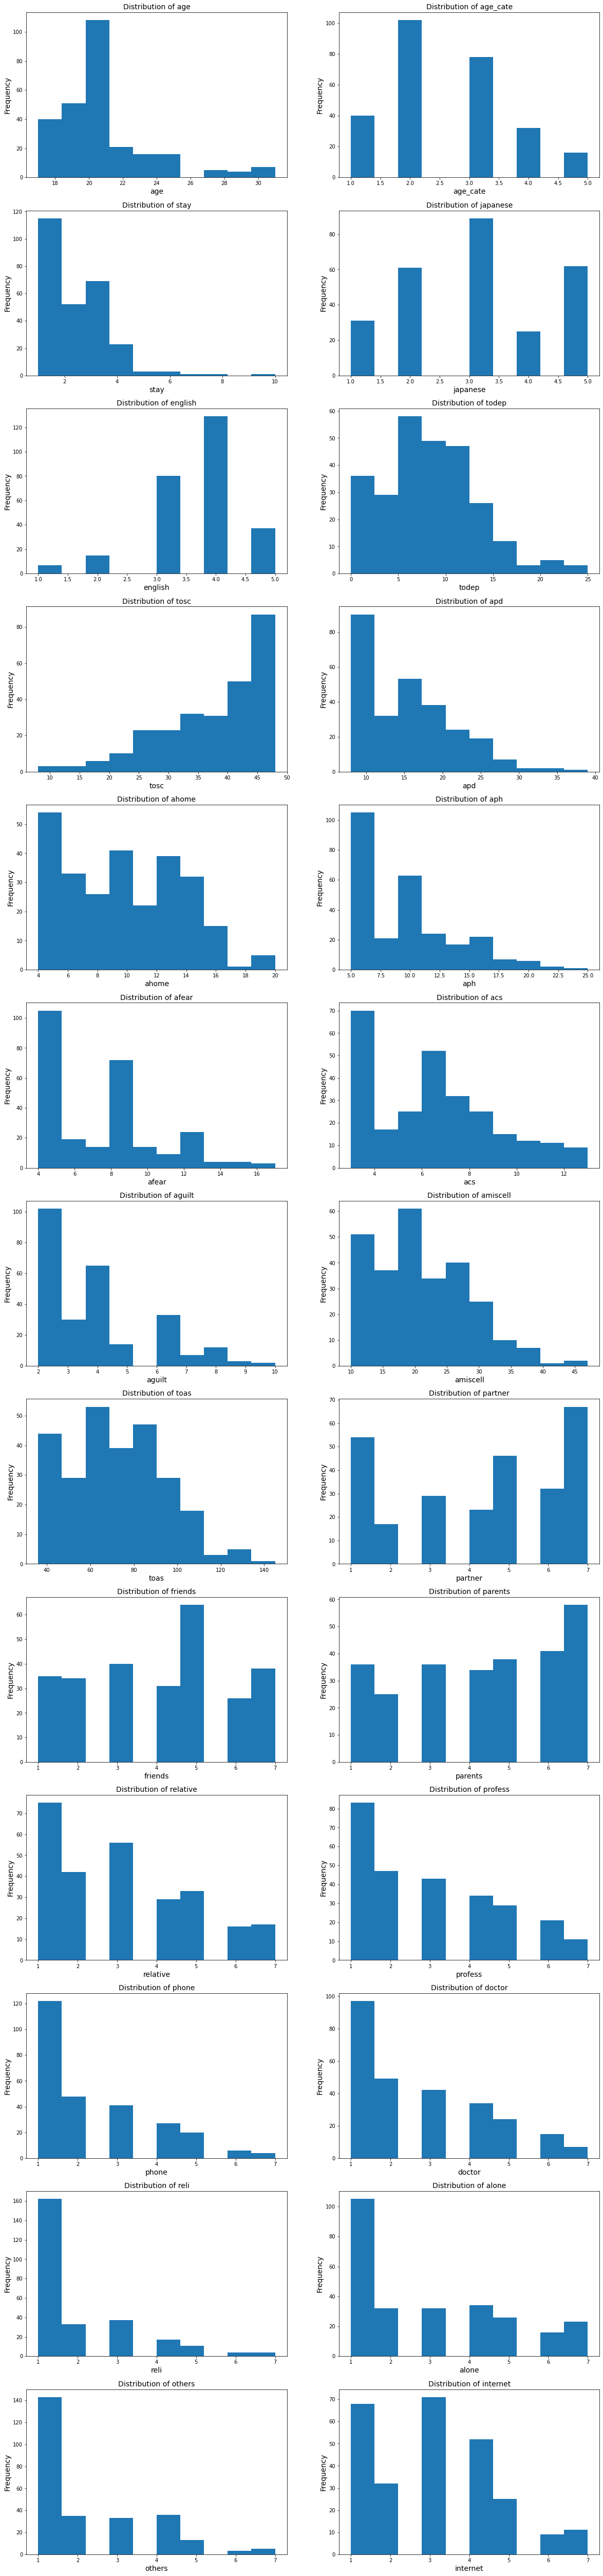

In [70]:
#Plot the numeric columns' distribution
plot_numerical_charts(float_only, list(float_only))

Text(0.5, 1.0, 'Histogram of Depression Score/Severity')

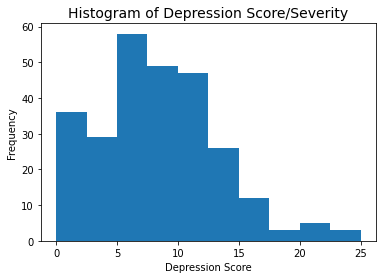

In [10]:
#Plot histogram of depression score/severity
#The distributed is right-skewed (mean higher than median)
plt.hist(float_only['todep'])
plt.xlabel('Depression Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of Depression Score/Severity', fontsize=14)

### Categorical columns

In [74]:
#to plot the frequency of values from categorical columns
def plot_categorical_charts(data, columns):
    #2 is the number of columns
    fig = plt.figure(figsize=(10*2, 7*(len(columns)/2)))
    
    for col_number, col_name in enumerate(columns):
        
        #no of rows, no of columns, nth subplot (index)
        fig.add_subplot(math.ceil(len(columns)/2), 2, col_number + 1)
        sns.countplot(data[col_name])
        plt.xlabel(col_name, fontsize=14)
        plt.ylabel('count', fontsize=14)
        plt.title('Count plot of ' + col_name, fontsize=14)

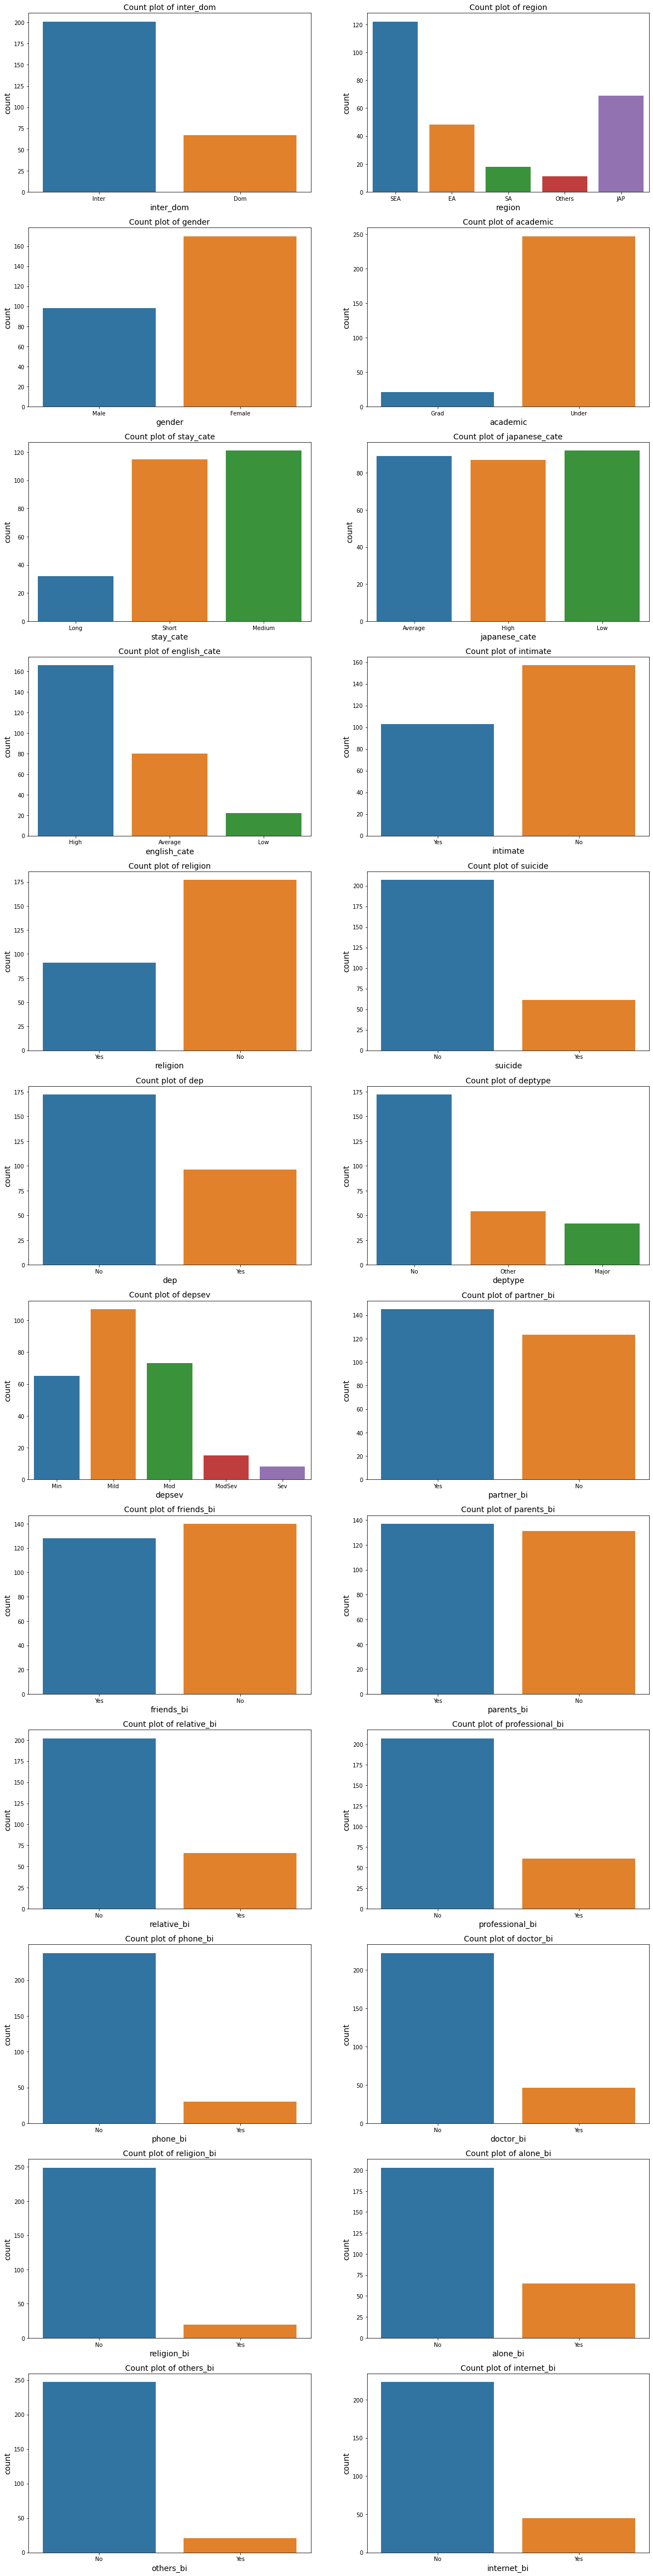

In [75]:
#Plot the categorical column values 
plot_categorical_charts(object_only, list(object_only))

Text(0.5, 1.0, 'Count plot of Suicide Ideation')

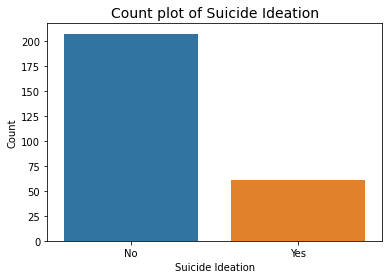

In [9]:
#Plot suicide ideation (our target variable for task 2) count plot
#Imbalanced classes for 'suicide'
sns.countplot(object_only['suicide'])
plt.xlabel('Suicide Ideation', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count plot of Suicide Ideation', fontsize=14)

## Bivariate analysis
In this section, we will perform bivariate analysis to investigate the relationship and correlation between the variables. 

We will focus on a few variables when performing bivariate analysis:
- ToDep (Whether students have suicidal Ideation in the last 2 weeks or not (based on a question in PHQ-9))
- Suicide (Total score of depression measured by PHQ-9)

### Correlation Matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]),
 <a list of 26 Text major ticklabel objects>)

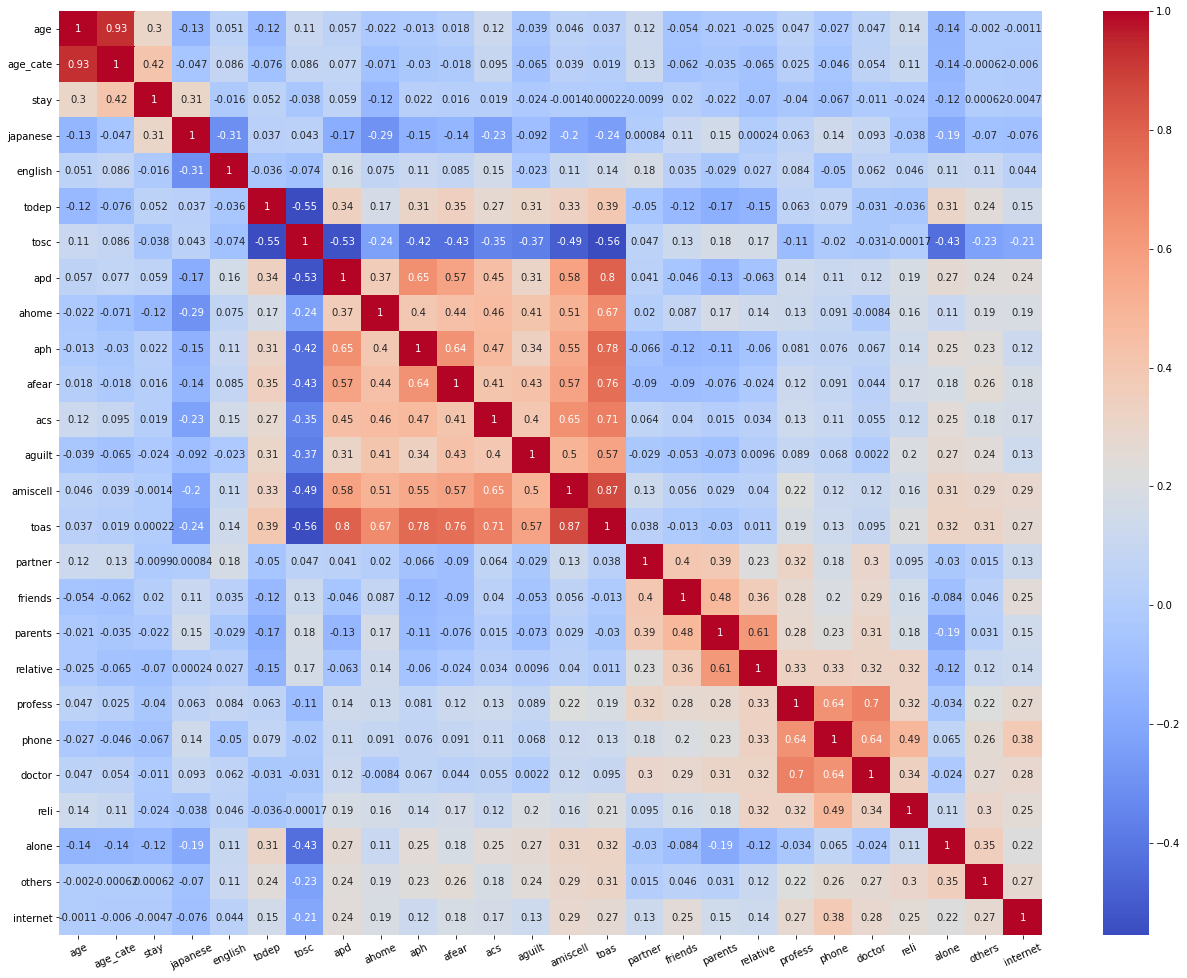

In [100]:
#Get correlation matrix
plt.figure(figsize=(22,17))
sns.heatmap(cleaned_results.corr(), cmap='coolwarm', annot=True)
plt.xticks(rotation=25)

### Depression vs Social Connectedness
From the correlation matrix, we see that there's a negative correlation between ToDep (depression score) and ToSC (total social connectedness). It makes sense since the more socially connected one is, the lower the depression score. Hence, we will be studying the relationship between these two variables.

Text(0.5, 1.0, 'Depression Score vs Social Connectedness')

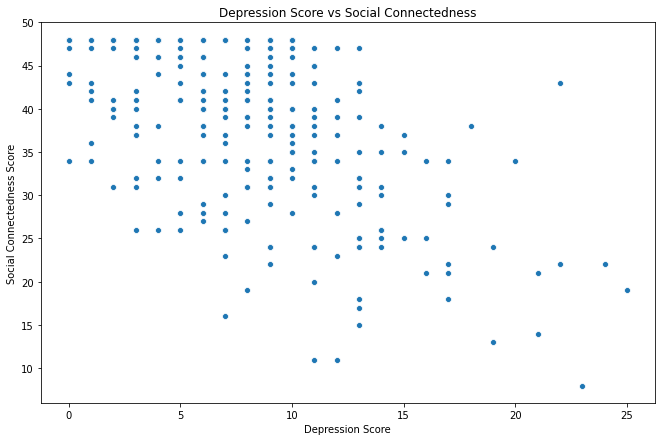

In [91]:
#Plot a scatterplot between todep vs tosc
plt.figure(figsize=(11,7))
sns.scatterplot(x=cleaned_results['todep'], y=cleaned_results['tosc'])
plt.xlabel('Depression Score')
plt.ylabel('Social Connectedness Score')
plt.title('Depression Score vs Social Connectedness')

### Depression vs Perceived Discrimination
Another interesting correlation that we see is a relatively high score between ToDep (depression score) and APD (perceived discrimination score). We can hypothesize that the more discriminated a student feels, the higher the depression score. Hence, we will also be studying the relationship between these two variables.

Text(0.5, 1.0, 'Depression Score vs Perceived Discrimination')

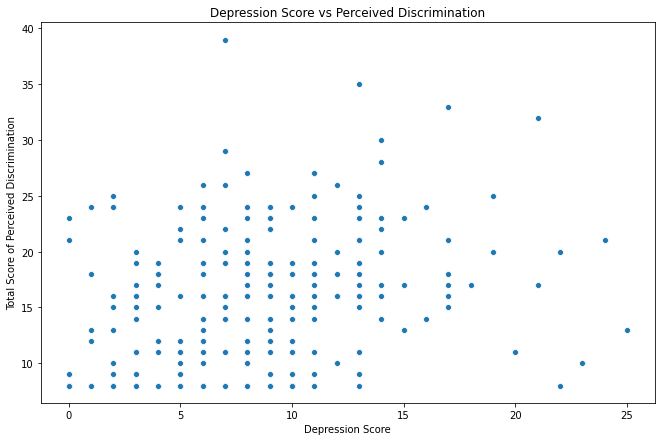

In [92]:
#Plot a scatterplot between ToDep and APD
plt.figure(figsize=(11,7))
sns.scatterplot(x=cleaned_results['todep'], y=cleaned_results['apd'])
plt.xlabel('Depression Score')
plt.ylabel('Total Score of Perceived Discrimination')
plt.title('Depression Score vs Perceived Discrimination')

### Depression vs Type of Student
Let's take a look at whether foreign students experience a higher depression score compared to domestic students. 

([<matplotlib.axis.XTick at 0x12d1d7190>,
 [Text(0, 0, 'International'), Text(0, 0, 'Domestic')])

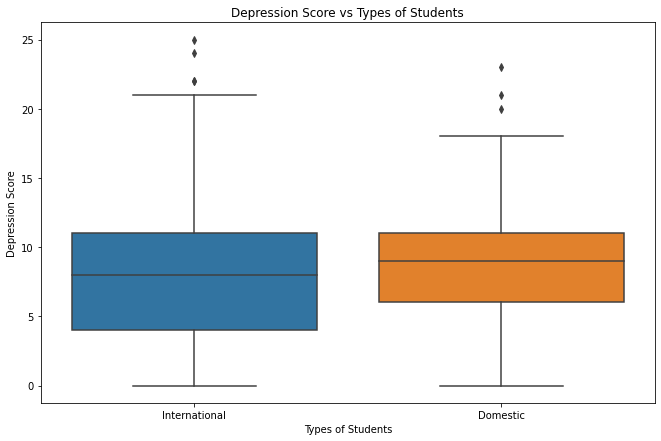

In [101]:
#Plot a boxplot between inter_dom and ToDep
plt.figure(figsize=(11,7))
sns.boxplot(x=cleaned_results['inter_dom'], y=cleaned_results['todep'])
plt.xlabel('Types of Students')
plt.ylabel('Depression Score')
plt.title('Depression Score vs Types of Students')
plt.xticks([0,1],['International', 'Domestic'])

#### Independent t-test
Here, we do an independent t-test to determine if there is a statistically significant different between the means of these two groups.

Our null hypothesis and alternate hypotheses:<br>

$H_0$: The true mean difference in depression scores between international and domestic students is 0.<br>
$H_A$: The true mean difference in depression scores between international and domestic students is not 0.

In [119]:
#Get a list containing ToDep from 'Inter', and a list containing ToDep from 'Dom'
todep_inter = cleaned_results[cleaned_results['inter_dom'] == 'Inter']['todep']
todep_dom = cleaned_results[cleaned_results['inter_dom'] == 'Dom']['todep']

In [122]:
#Variance differs between both groups
print('Inter\'s variance:', stat.variance(todep_inter))
print('Dom\'s variance:', stat.variance(todep_dom))

Inter's variance: 24.052985074626864
Dom's variance: 26.18046132971506


In [128]:
#Use ttest_ind on the two lists and print the results
#equal_variance is false since var differs
t_stats, p_value = ttest_ind(todep_inter, todep_dom, equal_var=False)
print('t-statistic:', round(t_stats,3))
print('p-value:', round(p_value,3))

t-statistic: -0.794
p-value: 0.429


Since p-value of 0.429 is more than 0.05 (p-value > 0.05), we fail to reject $H_0$.<br> 
Hence, there is insufficient evidence to conclude that the mean depression score differs between international and domestic students.


### Depression vs Suicide
In the dataset, Suicide refers to whether the students as had suicide ideation in the past two weeks.

Text(0.5, 1.0, 'Depression Score vs Suicidal Ideation')

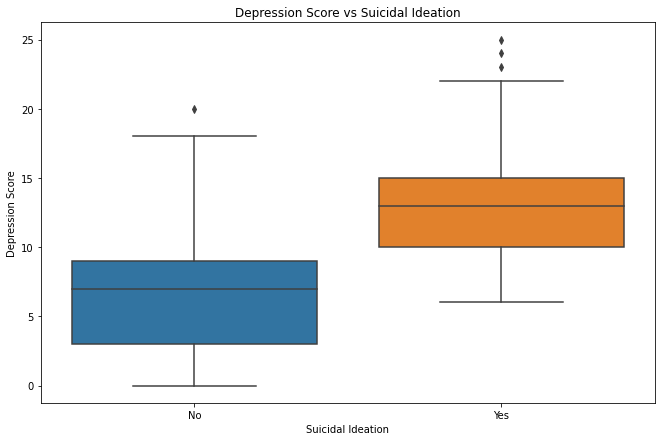

In [130]:
#Plot boxplot between Suicide and ToDep
plt.figure(figsize=(11,7))
sns.boxplot(x=cleaned_results['suicide'], y=cleaned_results['todep'])
plt.xlabel('Suicidal Ideation')
plt.ylabel('Depression Score')
plt.title('Depression Score vs Suicidal Ideation')


#### Independent t-test
The boxplot result should be very obvious in answering whether there is a difference between suicide ideation and the total depressions score. However, for confirmation we shall perform another independent t-test between the Yes and No groups. 

Our null hypothesis and alternate hypothesis:<br>

$H_0$: The true mean difference in depression scores between suicidal and non-suicidal students is 0.<br>
$H_A$: The true mean difference in depression scores between suicidal and non-suicidal students is not 0.

In [133]:
todep_suicide = cleaned_results[cleaned_results['suicide'] == 'Yes']['todep']
todep_non_suicide = cleaned_results[cleaned_results['suicide'] == 'No']['todep']

In [136]:
print('Yes\'s variance:', stat.variance(todep_suicide))
print('No\'s variance:', stat.variance(todep_non_suicide))

Yes's variance: 20.994535519125684
No's variance: 16.268467707893628


In [139]:
#Repeat the t-test
t_stat, p_value = ttest_ind(todep_suicide, todep_non_suicide, equal_var=False)
print('t-statistic:', round(t_stat,3))
print('p-value:', round(p_value,3))

t-statistic: 9.878
p-value: 0.0


Since p-value of 0 is less than 0.05 (p-value < 0.05), we reject $H_0$ and accept $H_A$.<br> 
Hence, there is sufficient evidence to conclude that the mean depression score differs between suicidal and domestic students.

### Depression vs Gender

Text(0.5, 1.0, 'Depression Score vs Gender')

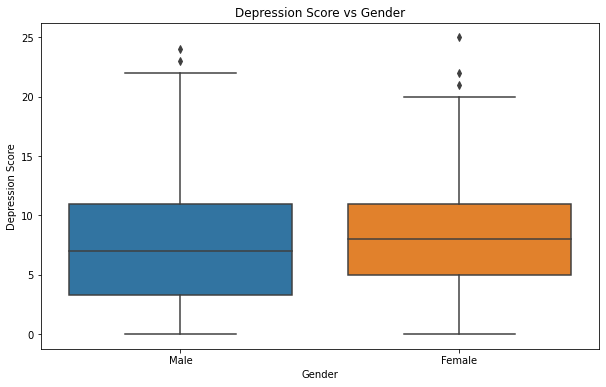

In [144]:
#Plot a boxplot on ToDep vs Gender
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_results['gender'], y=cleaned_results['todep'])
plt.xlabel('Gender')
plt.ylabel('Depression Score')
plt.title('Depression Score vs Gender')

#### Independent t-test

Our null hypothesis and alternate hypothesis:<br>

$H_0$: The true mean difference in depression scores between male and female students is 0.<br>
$H_A$: The true mean difference in depression scores between male and female students is not 0.

In [147]:
todep_female = cleaned_results[cleaned_results['gender'] == 'Female']['todep']
todep_male = cleaned_results[cleaned_results['gender'] == 'Male']['todep']

In [149]:
print('Female\'s variance:', stat.variance(todep_female))
print('Male\'s variance:', stat.variance(todep_male))

Female's variance: 21.827218934911244
Male's variance: 29.326741005680624


In [150]:
# Step 13: Repeat the t-test
t_stat, p_value = ttest_ind(todep_female, todep_male, equal_var=False)
print('t-statistic:', round(t_stat,3))
print('p-value:', round(p_value,3))

t-statistic: 0.893
p-value: 0.373


Since p-value of 0 is less than 0.05 (p-value < 0.05), we reject $H_0$ and accept $H_A$.<br> 
Hence, there is sufficient evidence to conclude that the mean depression score differs between female and male students.

### Suicide vs Religion
One of the proposed questions in the article is whether having a religion affects suicide ideation. Hence, let's study the relationship between these two variables by plotting a contingency table, a table that displays the multivariate frequency distribution of the variables.

In [160]:
#Create a contingency table between Religion and Suicide
religion_counts = pd.crosstab(cleaned_results['religion'], cleaned_results['suicide'], margins=False)
religion_counts

suicide,No,Yes
religion,,
No,136,41
Yes,71,20


#### Chi-squared test of independence

Here we will perform a chi-squared test of independence between the two variables to determine if these two categorical variables are dependent. 

Our null hypothesis and alternate hypotheses:<br>

$H_0$: Having a religion ('religion') and suicide ideation ('suicide') are independent variables.<br>
$H_A$: Having a religion ('religion') and suicide ideation ('suicide') are dependent variables.



In [167]:
#Calculate chi-square statistics with chi2_contingecy
chi2_results = chi2_contingency(religion_counts)

#Print the results
print('Chi square statistics:', round(chi2_results[0],3))
print('p-value:', round(chi2_results[1],3))
print('Expected values:', chi2_results[3])

Chi square statistics: 0.004
p-value: 0.948
Expected values: [[136.71268657  40.28731343]
 [ 70.28731343  20.71268657]]


Since p-value of 0.948 is more than 0.05 (p-value > 0.05), we fail to reject $H_0$.<br>
Hence, there is insufficient evidence to conclude that religion and suicide are dependent variables.

### Intimate vs Suicide
Here, we study both Intimate and Suicide variables - is having a partner in life and suicide ideation independent of each other?

#### Contingency Table

In [168]:
#Create a contingency table between Intimate and Suicide
intimate_counts = pd.crosstab(cleaned_results['intimate'], cleaned_results['suicide'], margins=False)
intimate_counts

suicide,No,Yes
intimate,,
No,121,36
Yes,79,24


#### Chi-squared Test of Independence 

Our null hypothesis and alternate hypotheses:<br>

$H_0$: Having a partner in life ('Intimate') and suicide ideation ('suicide') are independent variables.<br>
$H_A$: Having a partner in life ('Intimate') and suicide ideation ('suicide') are dependent variables.

In [169]:
# Step 16b: Calculate chi-square statistics with chi2_contingecy
chi2_results = chi2_contingency(intimate_counts)
# Step 16b: Print the results from 16b
print('Chi square statistics:', round(chi2_results[0],3))
print('p-value:', round(chi2_results[1],3))
print('Expected values:', chi2_results[3])

Chi square statistics: 0.007
p-value: 0.935
Expected values: [[120.76923077  36.23076923]
 [ 79.23076923  23.76923077]]


Since p-value of 0.935 is more than 0.05 (p-value > 0.05), we fail to reject $H_0$.<br>
Hence, there is insufficient evidence to conclude that religion and suicide are dependent variables, which means that they are both independent variables.

### Depression vs Suicide 

Dep vs Suicide - is having depressive symptoms and suicide ideation independent of each other?

#### Contingency Table

In [172]:
#Create a contingency table between Depression and Suicide
dep_counts = pd.crosstab(cleaned_results['dep'], cleaned_results['suicide'], margins=False)
dep_counts

suicide,No,Yes
dep,,
No,151,21
Yes,56,40


#### Chi-squared Test of Independence 

Our null hypothesis and alternate hypotheses:<br>

$H_0$: Having depressive symptoms ('dep') and suicide ideation ('suicide') are independent variables.<br>
$H_A$: Having depressive symptoms ('dep')  and suicide ideation ('suicide') are dependent variables.

In [173]:
# Step 16b: Calculate chi-square statistics with chi2_contingecy
chi2_results = chi2_contingency(dep_counts)
# Step 16b: Print the results from 16b
print('Chi square statistics:', round(chi2_results[0],3))
print('p-value:', round(chi2_results[1],3))
print('Expected values:', chi2_results[3])

Chi square statistics: 28.758
p-value: 0.0
Expected values: [[132.85074627  39.14925373]
 [ 74.14925373  21.85074627]]


Since p-value of 0.0 is less than 0.05 (p-value < 0.05), we reject $H_0$ and accept $H_A$.<br>
Hence, there is sufficient evidence to conclude that depression and suicide are dependent variables.

Alone_bi vs Suicide - is the willingness to solve problems by oneself and suicide ideation indepedent of each other?
Whether students are willing to solve problems by themselves

### Alone_bi vs Suicide 

Alone_bi vs Suicide - is the willingness to solve problems by oneself and suicide ideation indepedent of each other?

#### Contingency Table

In [174]:
#Create a contingency table between Alone_bi and Suicide
alone_counts = pd.crosstab(cleaned_results['alone_bi'], cleaned_results['suicide'], margins=False)
alone_counts

suicide,No,Yes
alone_bi,,
No,169,34
Yes,38,27


#### Chi-squared Test of Independence 

Our null hypothesis and alternate hypotheses:<br>

$H_0$: Willingness to solve problems by oneself ('alone_bi') and suicide ideation ('suicide') are independent variables.<br>
$H_A$: Willingness to solve problems by oneself ('alone_bi') and suicide ideation ('suicide') are dependent variables.

In [175]:
# Step 16b: Calculate chi-square statistics with chi2_contingecy
chi2_results = chi2_contingency(alone_counts)
# Step 16b: Print the results from 16b
print('Chi square statistics:', round(chi2_results[0],3))
print('p-value:', round(chi2_results[1],3))
print('Expected values:', chi2_results[3])

Chi square statistics: 15.829
p-value: 0.0
Expected values: [[156.79477612  46.20522388]
 [ 50.20522388  14.79477612]]


Since p-value of 0.0 is less than 0.05 (p-value < 0.05), we reject $H_0$ and accept $H_A$.<br>
Hence, there is sufficient evidence to conclude that willingness to solve problems by oneself (alone_bi) and suicide are dependent variables.